# Sequence Training

This is a very simple example of using LSTMs and related methods. You're given a sequence of numbers (in the first cases a very simple sinus function), and your job is to predict the next points in the sequence.

There are several ML packages, which have an LSTM implementation, and probably most widely used are:
* Keras Tensorflow (see e.g. https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
* PyTorch (see e.g. https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html)

When you get predictions to work, work your way down to include the mackay sequence and generally ask yourself:
* How does your prediction work into the future?
* Can the a

Author: James Avery
Date: 4th of May 2020

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
Ntrain   = 2500
Npredict = 500
xs = np.linspace(0,30*2*np.pi,Ntrain+Npredict)

In [57]:
sins1 = np.sin(xs)
sins2 = np.sin(2*xs)
sins3 = np.sin(3*xs)
sins5 = np.sin(5*xs)
sins7 = np.sin(7*xs)

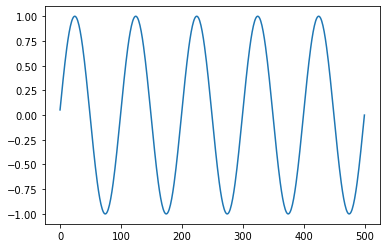

In [58]:
# Training data for task 1
train1 = sins1[:Ntrain]

# Expected result that we want to predict for task one
pred1  = sins1[Ntrain:Ntrain+Npredict]
plt.plot(pred1)

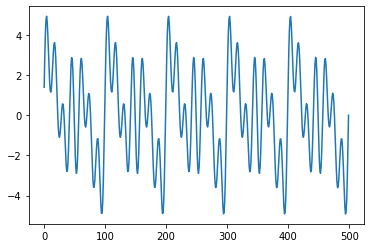

In [59]:
# Training data for task 2
data2  = sins1+2*sins2+sins3+sins5+2*sins7
train2 = data2[:Ntrain]

# Desired result that we want to predict for task two
truth2  = data2[Ntrain:Ntrain+Npredict]
plt.plot(pred2)

In [45]:
def mackey_sequence(b=None, N=3000):
    """Create the Mackey-Glass series"""
    c = 0.2
    tau = 17
    n = 10

    yinit = np.array([0.9697, 0.9699, 0.9794, 1.0003, 1.0319, 1.0703, 1.1076,
        1.1352, 1.1485, 1.1482, 1.1383, 1.1234, 1.1072, 1.0928, 1.0820, 1.0756,
        1.0739, 1.0759])

    if b is None:
        b = np.zeros(N) + 0.1

    y = np.zeros(N)
    y[:yinit.shape[0]] = yinit

    for i in range(tau, N - 1):
        yi = y[i] - b[i] * y[i] + c * y[i - tau] / (1 + y[i - tau]**n)
        y[i + 1] = yi
    return y

In [63]:
# Training data for task 3
data3 = mackey_sequence()
train3 = data3[:Ntrain]

# Desired result that we want to predict for task 3
truth3  = data3[Ntrain:Ntrain+Npredict]

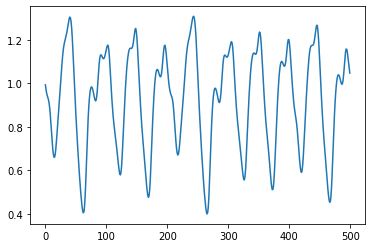

In [64]:
plt.plot(pred3)